<a href="https://colab.research.google.com/github/Athotakb88/CodSoft-DataScience-Internship/blob/main/Task_3_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Prediction using Python
## Internship Project – CodSoft Data Science




#Problem Statement
#Objective

To build a machine learning model that predicts future sales of a product based on factors such as advertising expenditure, marketing platform, or other business-related features.

Why Sales Prediction?

-Sales prediction helps businesses
-Plan marketing budgets
-Optimize advertising strategies
-Increase revenue
-Make data-driven decisions

Type of Problem
👉 Regression problem (Sales is a continuous numeric value)

In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load the Dataset
data = pd.read_csv("sales.csv")
data.head(10)


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [ ]:
#Check dataset size:
data.shape


(100, 14)

In [ ]:
#Understand Dataset Structure
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
#Statistical Summary
data.describe()


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
#Check Missing Values
data.isnull().sum()


,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [ ]:
#Handle missing values
data.dropna(inplace=True)

#ML models cannot work with missing values.


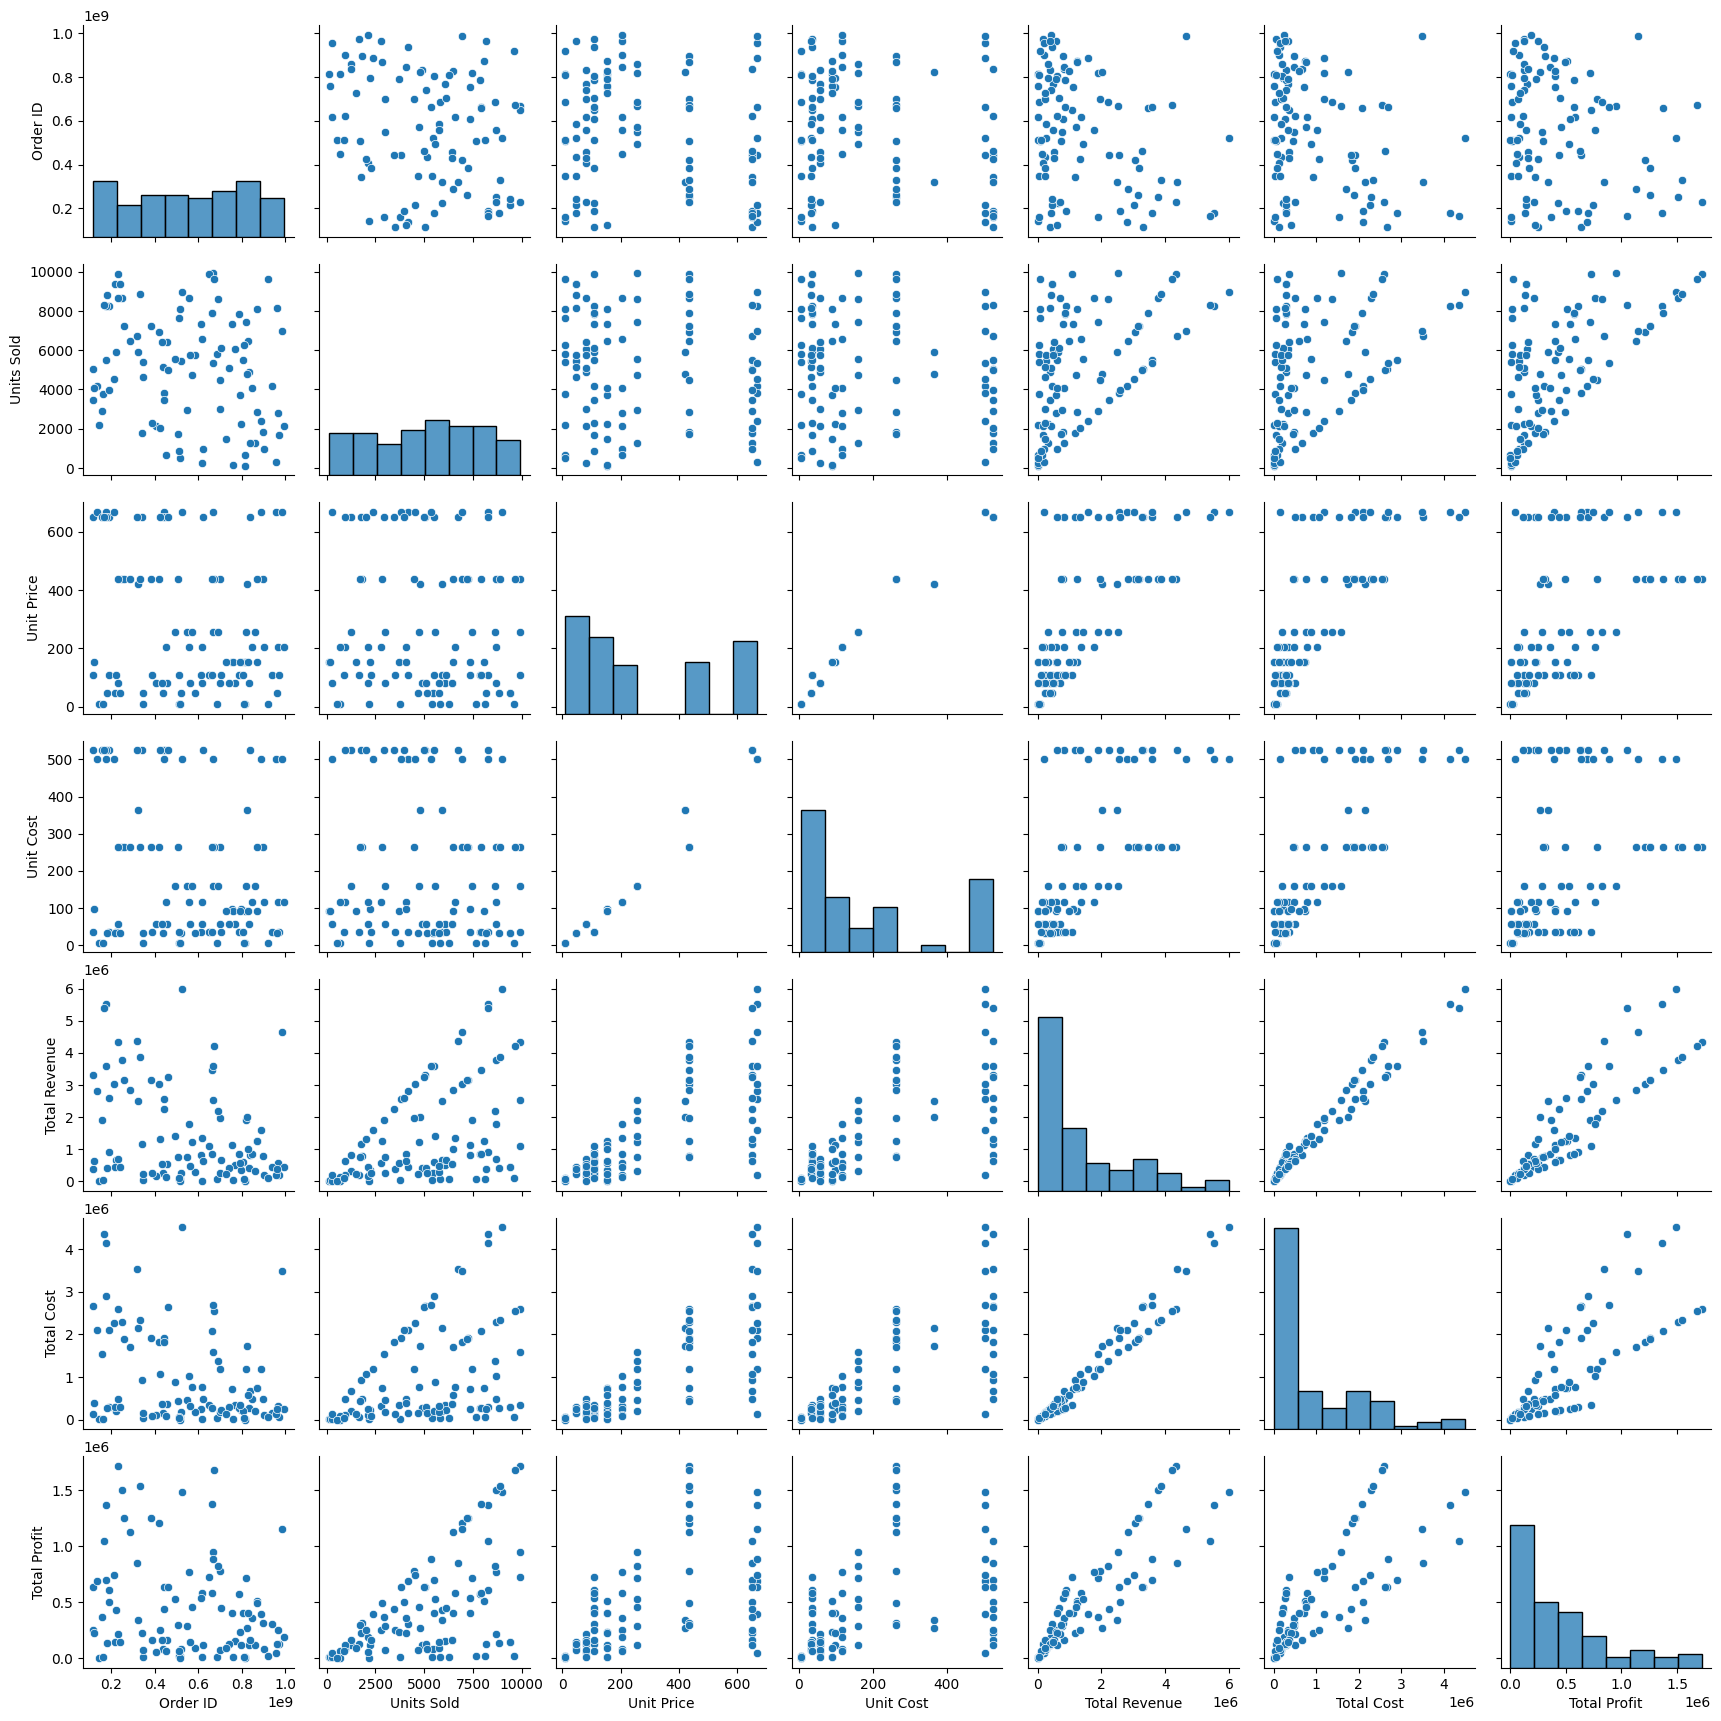

In [ ]:
#Exploratory Data Analysis
#Visualize relationship between advertising & sales

sns.pairplot(data)
plt.show()


#Helps understand how advertising affects sales.

In [ ]:
print(data.columns)

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')


In [ ]:
#Feature Selection

X = data.drop("Total Revenue", axis=1)
y = data["Total Revenue"]


#X → Advertising spends
#y → Sales (target variable)


In [ ]:
x=data.drop('Total Revenue',axis=1)
y=data['Total Revenue']

In [ ]:
#Convert date columns

X['Order Date'] = pd.to_datetime(X['Order Date'])
X['Ship Date'] = pd.to_datetime(X['Ship Date'])

X['Order Date'] = X['Order Date'].astype('int64') // 10**9
X['Ship Date'] = X['Ship Date'].astype('int64') // 10**9

In [ ]:
#Encode categorical columns
X = pd.get_dummies(X, drop_first=True)

In [ ]:
#Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#80% training, 20% testing.

In [ ]:
#Model Selection & Training
#Using Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Make Predictions
y_pred = model.predict(X_test)

#Predicts sales for new advertising data.


In [ ]:
#Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


#Explanation
#-MSE → Prediction error
#-R² Score → Model performance (closer to 1 is better)


Mean Squared Error: 5.609994152132451e-15
R2 Score: 1.0


In [ ]:
#Final Conclusion
## Conclusion
In this project, a sales prediction system was developed using machine learning regression techniques.
Advertising expenditure showed a strong influence on sales performance.
The trained model can help businesses make informed marketing and budgeting decisions.
